In [1]:
%matplotlib inline

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression

# Mashine learning introduction

## Data tidying and EDA:

In [41]:
diabetic_data = pd.read_csv("data/diabetic_data.csv", na_values = ["?"])

C:\Users\USER\AppData\Local\Temp\ipykernel_8380\1457003783.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetic_data = pd.read_csv("data/diabetic_data.csv", na_values = ["?"])


na_values=["?"] - if there is "?" value pandas reads it as NaN

In [42]:
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [43]:
diabetic_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [44]:
diabetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

My target is column 'readmitted' - whether the patient was readmitted to hospital. This column is categorial, so the model i need to use will be a classifier.

In [45]:
diabetic_data.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [46]:
diabetic_data.readmitted.value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [47]:
diabetic_data.race.value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [48]:
diabetic_data.gender.value_counts(dropna=False)

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [49]:
diabetic_data.age.value_counts(dropna=False)

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [50]:
# normalise age data (%):
diabetic_data.age.value_counts(dropna=False) / len(diabetic_data) * 100

age
[70-80)     25.615628
[60-70)     22.092840
[50-60)     16.956547
[80-90)     16.898571
[40-50)      9.516931
[30-40)      3.709490
[90-100)     2.744532
[20-30)      1.628245
[10-20)      0.679009
[0-10)       0.158206
Name: count, dtype: float64

In [51]:
# this column have high cardinality
diabetic_data.discharge_disposition_id.value_counts(dropna=False)

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

In [52]:
diabetic_data.metformin.value_counts(dropna=False)

metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64

In [56]:
diabetic_data.patient_nbr

0           8222157
1          55629189
2          86047875
3          82442376
4          42519267
            ...    
101761    100162476
101762     74694222
101763     41088789
101764     31693671
101765    175429310
Name: patient_nbr, Length: 101766, dtype: int64

In [57]:
# how many records there are for one patient:
diabetic_data.patient_nbr.nunique() / len(diabetic_data)

0.7027690977340173

In [58]:
# how many visits patients have:
diabetic_data.patient_nbr.value_counts(dropna=False)

patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64

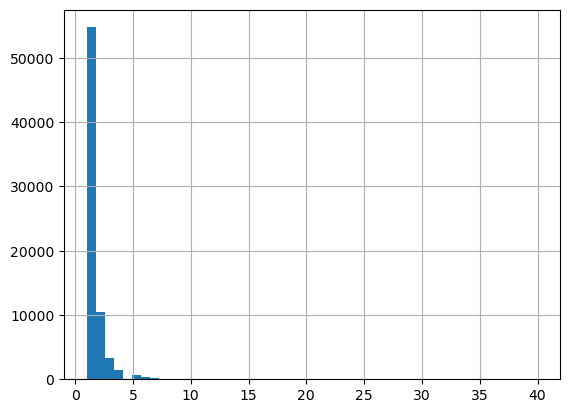

In [62]:
diabetic_data.patient_nbr.value_counts().hist(bins=50)
plt.show()

Most patients have 1 visit.

In [70]:
# check the patient that have 40 visits
diabetic_data[diabetic_data.patient_nbr == 88785891].sort_values(by="encounter_id").insulin

38307       Up
40252     Down
40661       Up
44515       Up
45147       Up
45986       Up
50167       Up
50393       Up
50773       Up
51519       Up
52057       Up
53771     Down
54497     Down
60263       Up
62759       Up
63165     Down
65667       Up
67968     Down
71029       Up
72068     Down
74405       Up
74876     Down
75267     Down
76525       Up
76907     Down
78355       Up
78882       Up
79202       Up
79467       Up
82693     Down
87063     Down
87854       Up
88392       Up
89964     Down
90913       Up
91444       Up
97433     Down
97732       Up
99950       Up
101385      No
Name: insulin, dtype: object

## Preparing a target

In [95]:
attributes = diabetic_data.drop(columns = "readmitted")

In [96]:
# labels:
target = diabetic_data.readmitted

Columns like patient_id and encounter_id have too much entropy and it doesn't give me needed information. I can remove them with Feature Selection algorithms, whose goal is to reduce the number of features by removing those that dont contribute to improving the performance of the model.

In [97]:
attributes = attributes.drop(columns = ["encounter_id", "patient_nbr"]) 

In [98]:
# main diagnose:
len(attributes[attributes.diag_1.isna()])

21

In [99]:
len(attributes[attributes.diag_2.isna()])

358

In [100]:
len(attributes[attributes.diag_3.isna()])

1423

In [101]:
len(attributes[attributes.weight.isna()]) # too many Nan values

98569

In [102]:
attributes = attributes.drop(columns = "weight") 

In [103]:
attributes = attributes.drop(columns = ["payer_code", "medical_specialty"]) 

In [105]:
attributes.dropna()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
162,Caucasian,Male,[80-90),6,3,7,5,47,1,6,...,No,No,No,No,No,No,No,No,No,No
460,AfricanAmerican,Female,[70-80),6,1,7,10,72,1,19,...,No,No,Up,No,No,No,No,No,Ch,Yes
593,Caucasian,Female,[50-60),6,1,7,2,61,0,5,...,No,No,Steady,No,No,No,No,No,No,Yes
696,Other,Male,[70-80),6,6,7,11,71,1,20,...,No,No,No,No,No,No,No,No,No,Yes
771,Caucasian,Female,[30-40),6,1,2,14,43,0,11,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100386,Caucasian,Male,[60-70),2,1,1,6,51,0,20,...,No,No,No,No,No,No,No,No,No,Yes
100493,Caucasian,Female,[40-50),1,1,7,3,78,0,8,...,No,No,No,No,No,No,No,No,No,No
100578,Caucasian,Female,[60-70),1,2,7,4,90,0,25,...,No,No,No,No,No,No,No,No,No,No
101029,Caucasian,Male,[50-60),1,1,7,7,72,0,16,...,No,No,No,No,No,No,No,No,Ch,Yes


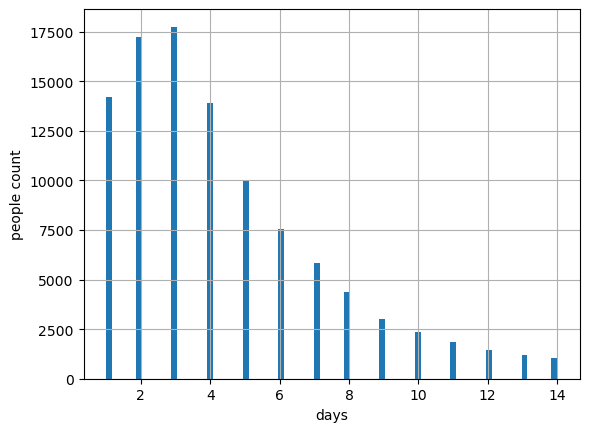

In [112]:
attributes.time_in_hospital.hist(bins = "fd")
plt.xlabel("days")
plt.ylabel("people count")
plt.show()

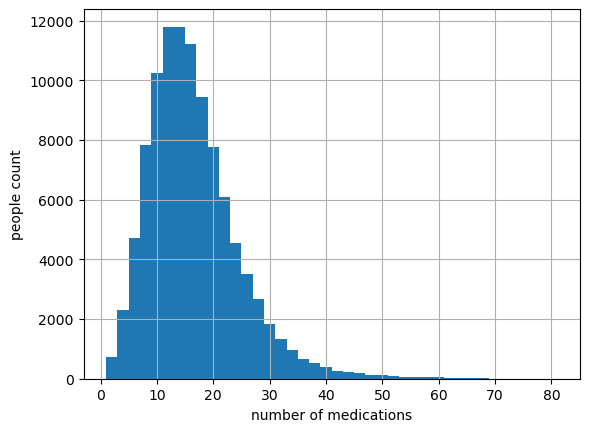

In [116]:
attributes.num_medications.hist(bins = 40)
plt.xlabel("number of medications")
plt.ylabel("people count")
plt.show()

In [127]:
# errors like:
0.1 + 0.2 == 0.3, 0.1 + 0.2

(False, 0.30000000000000004)

In [126]:
10000000000000000.0 + 1 == 10000000000000000.0

True

So that there are no such errors, it is good to scale (normalisation) the data (for example the numbers should be between 0 and 1). \
Types of data standartization:

### Standardization of numerical features:

In [147]:
# Z-score (standartization)
z_score = (attributes.num_medications - attributes.num_medications.mean()) / attributes.num_medications.std()

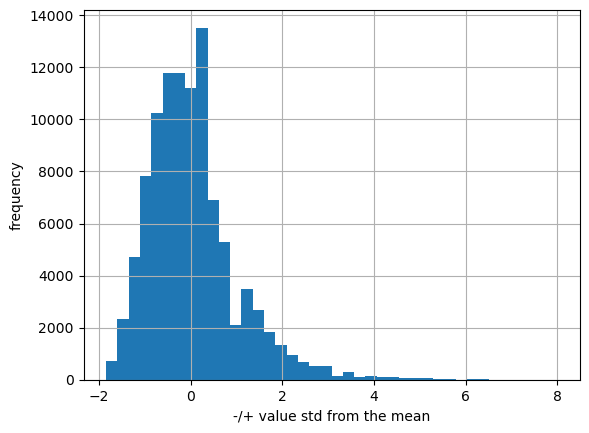

0        -1.848259
1         0.243388
2        -0.371802
3        -0.002688
4        -0.986992
            ...   
101761   -0.002688
101762    0.243388
101763   -0.863954
101764    0.612503
101765   -1.602182
Name: num_medications, Length: 101766, dtype: float64

In [142]:
z_score.hist(bins = 40)
plt.xlabel("-/+ value std from the mean")
plt.ylabel("frequency")
plt.show()
z_score

In [145]:
# Min-Max scaling:
norm = (attributes.num_medications - attributes.num_medications.min()) / (attributes.num_medications.max() -  attributes.num_medications.min())

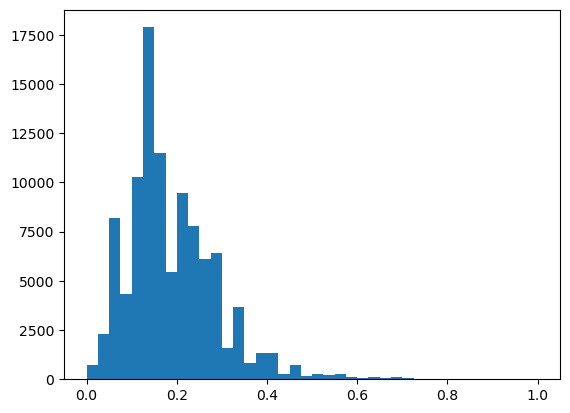

In [146]:
plt.hist(norm, bins = 40)
plt.show()

### Standartization of categorial features:

In [156]:
# get_dummies() transforms categorical variables into numeric ones by creating new binary columns for each category:
pd.get_dummies(attributes[["metformin"]]).astype(int)

,metformin_Down,metformin_No,metformin_Steady,metformin_Up
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
101761,0,0,1,0
101762,0,1,0,0
101763,0,0,1,0
101764,0,1,0,0


In [158]:
attributes.metformin.replace({"No": -99, "Down": -1, "Up": 1, "Steady": 0})

0        -99
1        -99
2        -99
3        -99
4        -99
          ..
101761     0
101762   -99
101763     0
101764   -99
101765   -99
Name: metformin, Length: 101766, dtype: int64

In [161]:
# to reduce the number of columns:
attributes = pd.get_dummies(attributes, drop_first=True)

In [162]:
attributes

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,...,False,True,False,False,False,False,False,False,True,False
1,1,1,7,3,59,0,18,0,0,0,...,True,True,False,False,False,False,False,False,False,True
2,1,1,7,2,11,5,13,2,0,1,...,False,True,False,False,False,False,False,False,True,True
3,1,1,7,2,44,1,16,0,0,0,...,True,True,False,False,False,False,False,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,3,7,3,51,0,16,0,0,0,...,False,True,False,False,False,False,False,False,False,True
101762,1,4,5,5,33,3,18,0,0,1,...,False,True,False,False,False,False,False,False,True,True
101763,1,1,7,1,53,0,9,1,0,0,...,False,True,False,False,False,False,False,False,False,True
101764,2,3,7,10,45,2,21,0,0,1,...,True,True,False,False,False,False,False,False,False,True


In [165]:
# Scaling:
scaler = MinMaxScaler()

In [166]:
scaler.fit(attributes)

MinMaxScaler()

In [168]:
scaler.transform(attributes).max(axis = 0)

array([1., 1., 1., ..., 1., 1., 1.])

In [174]:
attributes = scaler.transform(attributes)

In [175]:
attributes.shape

(101766, 2330)

In [176]:
attributes.dtype

dtype('float64')

In [178]:
encoder = OneHotEncoder()

In [183]:
lencoder = LabelEncoder()

### Data modeling

In [182]:
model = LogisticRegression()

In [184]:
model.fit(attributes, target)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [189]:
# classification accuracy:
model.score(attributes, target)

0.584409331210817